<a href="https://www.kaggle.com/muhammadarkaanahnaf/notebook0b66075b33?scriptVersionId=86004563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Importing test.csv and train.csv
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')
sample = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
#train and test dataset dimension
train.shape,test.shape

((891, 12), (418, 11))

In [4]:
#checking test.csv
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#summary of test.csv
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#checking train.csv
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#summary of train.csv
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#drop 'Name' and 'PassengerId' columns
train.drop(['PassengerId','Name'], axis=1, inplace=True)
test.drop(['PassengerId','Name'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


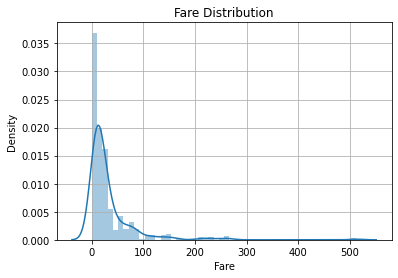

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['Fare'])
plt.title('Fare Distribution')
plt.grid()
plt.show()

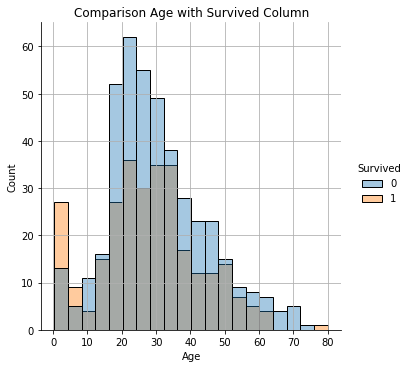

In [10]:
# Show a countplot with the number of age with group of survived column
sns.displot(data=train,
         x="Age",
         hue="Survived",
         alpha=0.4)
plt.title('Comparison Age with Survived Column')
plt.grid()
plt.show()

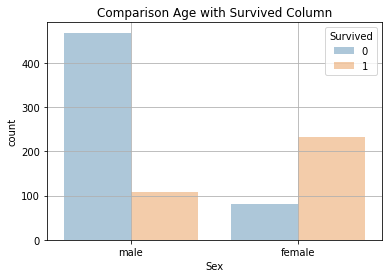

In [11]:
# Show a countplot with the sex with group of survived column
sns.countplot(data=train,
         x="Sex",
         hue="Survived",
         alpha=0.4)
plt.title('Comparison Age with Survived Column')
plt.grid()
plt.show()

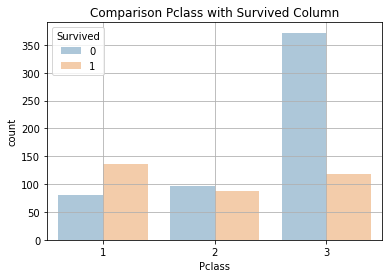

In [12]:
# Show a countplot with the Pclass with group of survived column
sns.countplot(data=train,
         x="Pclass",
         hue="Survived",
         alpha=0.4)
plt.title('Comparison Pclass with Survived Column')
plt.grid()
plt.show()

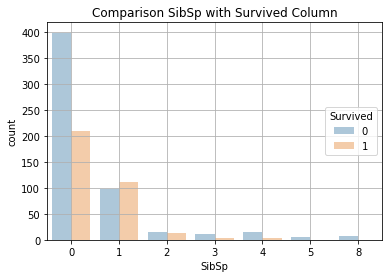

In [13]:
# Show a countplot with the SibSp with group of survived column
sns.countplot(data=train,
         x="SibSp",
         hue="Survived",
         alpha=0.4)
plt.title('Comparison SibSp with Survived Column')
plt.legend(loc='center right', title='Survived')
plt.grid()
plt.show()

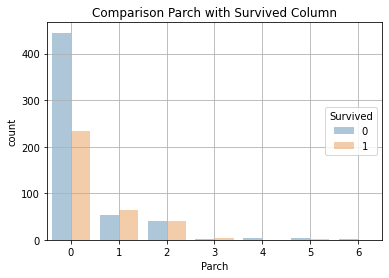

In [14]:
# Show a countplot with the Parch with group of survived column
sns.countplot(data=train,
         x="Parch",
         hue="Survived",
         alpha=0.4)
plt.title('Comparison Parch with Survived Column')
plt.grid()
plt.legend(loc='center right',title='Survived')
plt.show()

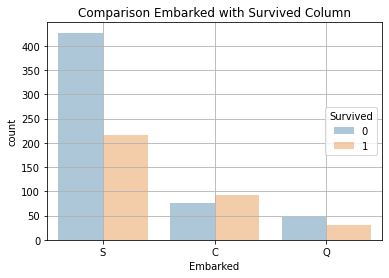

In [15]:
# Show a countplot with the Embarked with group of survived column
sns.countplot(data=train,
         x="Embarked",
         hue="Survived",
         alpha=0.4)
plt.title('Comparison Embarked with Survived Column')
plt.grid()
plt.legend(loc='center right',title='Survived')
plt.show()

In [16]:
#function to find Missing Value in every columns
def get_missing_value(df):
    mis_val = df.isnull().sum()
    tot_val = df.shape[0]
    mis_percentage = round((100 * mis_val / tot_val),2)
    miss_tab = pd.concat([mis_val, mis_percentage], axis=1)
    miss_tab_col_name = miss_tab.rename(columns = {0 : 'Row With Missing Value', 1 : 'Percentage (%)'})
    miss_tab_col_name = miss_tab_col_name.sort_values('Percentage (%)',ascending=False)
    return miss_tab_col_name

In [17]:
# function to add value labels in a plot
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Row With Missing Value,Percentage (%)
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


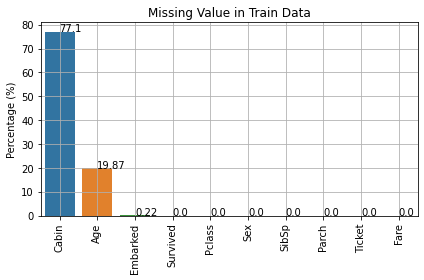

In [18]:
#Columns that has missing values in train data
miss_train = get_missing_value(train)
sns.barplot(miss_train.index,miss_train['Percentage (%)'])
addlabels(miss_train.index,miss_train['Percentage (%)'])
plt.title('Missing Value in Train Data')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
miss_train

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Row With Missing Value,Percentage (%)
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Embarked,0,0.00


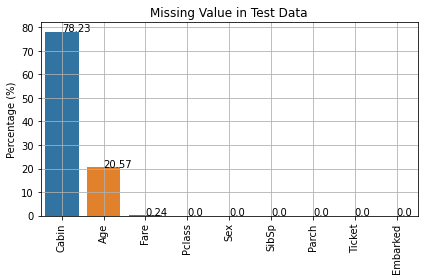

In [19]:
#Columns that has missing values in test data
miss_test = get_missing_value(test)
sns.barplot(miss_test.index,miss_test['Percentage (%)'])
addlabels(miss_test.index,miss_test['Percentage (%)'])
plt.title('Missing Value in Test Data')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
miss_test

In [20]:
#dropping cabin columns
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

In [21]:
#Replacing Age with mean values
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [22]:
#Fill in column e with the most frequent occurrence, namely S
train['Embarked'].fillna('S',inplace=True)

In [23]:
#Replacing Fare with mean values
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [24]:
#Check missing value again
get_missing_value(test),get_missing_value(train)

(          Row With Missing Value  Percentage (%)
 Pclass                         0             0.0
 Sex                            0             0.0
 Age                            0             0.0
 SibSp                          0             0.0
 Parch                          0             0.0
 Ticket                         0             0.0
 Fare                           0             0.0
 Embarked                       0             0.0,
           Row With Missing Value  Percentage (%)
 Survived                       0             0.0
 Pclass                         0             0.0
 Sex                            0             0.0
 Age                            0             0.0
 SibSp                          0             0.0
 Parch                          0             0.0
 Ticket                         0             0.0
 Fare                           0             0.0
 Embarked                       0             0.0)

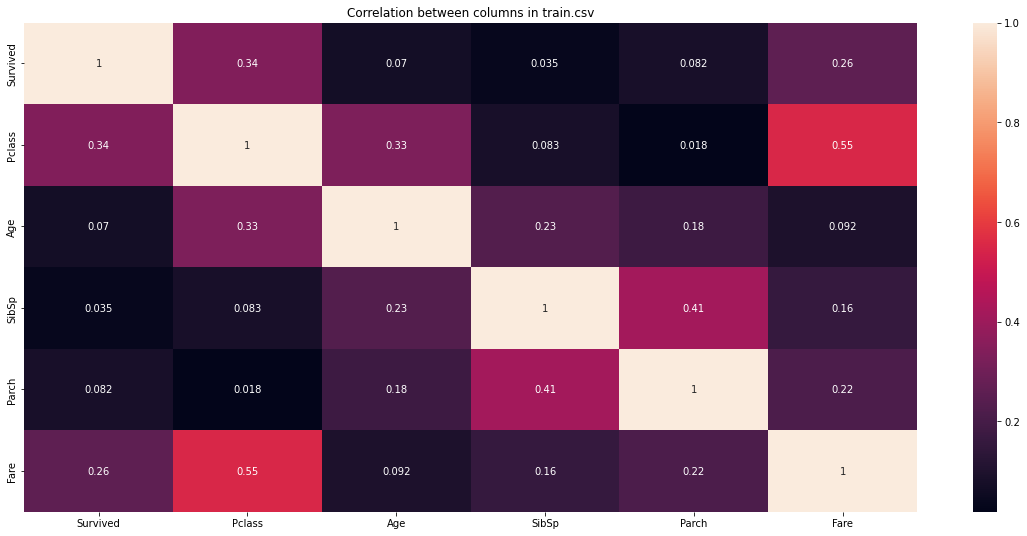

In [25]:
#correlation between column in train.csv
correlation = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(abs(correlation), annot=True)
plt.title('Correlation between columns in train.csv')
plt.show()

In [26]:
#Label Encoding for categorical features (train)
from sklearn.preprocessing import LabelEncoder
for i in train[train.dtypes[train.dtypes == "object"].index].columns:
    le = LabelEncoder() 
    le.fit(list(train[i].values)) 
    train[i] = le.transform(list(train[i].values))
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,2
1,1,1,0,38.000000,1,0,596,71.2833,0
2,1,3,0,26.000000,0,0,669,7.9250,2
3,1,1,0,35.000000,1,0,49,53.1000,2
4,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,2
887,1,1,0,19.000000,0,0,14,30.0000,2
888,0,3,0,29.699118,1,2,675,23.4500,2
889,1,1,1,26.000000,0,0,8,30.0000,0


In [27]:
#Label Encoding for categorical features (test)
for i in test[test.dtypes[test.dtypes == "object"].index].columns:
    le = LabelEncoder() 
    le.fit(list(test[i].values)) 
    test[i] = le.transform(list(test[i].values))
test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.50000,0,0,152,7.8292,1
1,3,0,47.00000,1,0,221,7.0000,2
2,2,1,62.00000,0,0,73,9.6875,1
3,3,1,27.00000,0,0,147,8.6625,2
4,3,0,22.00000,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,267,8.0500,2
414,1,0,39.00000,0,0,324,108.9000,0
415,3,1,38.50000,0,0,346,7.2500,2
416,3,1,30.27259,0,0,220,8.0500,2


In [28]:
#Define X_train and y_train
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
X_train,y_train

(     Pclass  Sex        Age  SibSp  Parch  Ticket     Fare  Embarked
 0         3    1  22.000000      1      0     523   7.2500         2
 1         1    0  38.000000      1      0     596  71.2833         0
 2         3    0  26.000000      0      0     669   7.9250         2
 3         1    0  35.000000      1      0      49  53.1000         2
 4         3    1  35.000000      0      0     472   8.0500         2
 ..      ...  ...        ...    ...    ...     ...      ...       ...
 886       2    1  27.000000      0      0     101  13.0000         2
 887       1    0  19.000000      0      0      14  30.0000         2
 888       3    0  29.699118      1      2     675  23.4500         2
 889       1    1  26.000000      0      0       8  30.0000         0
 890       3    1  32.000000      0      0     466   7.7500         1
 
 [891 rows x 8 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length

In [29]:
X_train.shape,test.shape,y_train.shape

((891, 8), (418, 8), (891,))

In [30]:
#Importing Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
#KNeighborsClassifier
# Creating the hyperparameter grid
knn_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
knn_weight = ['uniform', 'distance']
knn_algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
knn_leaf_size = [5,10,15,20,25,30,35,40,45,50]
param_grid = {'n_neighbors': knn_neighbors,
             'weights' : knn_weight,
             'algorithm' : knn_algorithm,
             'leaf_size' : knn_leaf_size,
             }

# Instantiating knn classifier
knn = KNeighborsClassifier()

# Instantiating the GridSearchCV object
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned KNN Classifier Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNN Classifier Parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 20, 'weights': 'distance'}
Best score is 0.7037536877785449


In [32]:
#DecisionTreeClassifier
# Creating the hyperparameter grid
dtr_criterion = ['gini','entropy']
dtr_splitter = ['best','random']
dtr_max_depth = [1,2,3,4,5,6,7,8,9,10]
dtr_max_features = ['auto','sqrt','log2']
param_grid = {'criterion': dtr_criterion,
             'splitter' : dtr_splitter,
             'max_depth' : dtr_max_depth,
             'max_features' : dtr_max_features,
             }

# Instantiating dtr classifier
dtr = DecisionTreeClassifier()

# Instantiating the GridSearchCV object
dtr_cv = GridSearchCV(dtr, param_grid, cv = 5)
dtr_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned DecisionTreeClassifier Classifier Parameters: {}".format(dtr_cv.best_params_)) 
print("Best score is {}".format(dtr_cv.best_score_))

Tuned DecisionTreeClassifier Classifier Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'random'}
Best score is 0.821568012051974


In [33]:
#RandomForestClassifier
# Creating the hyperparameter grid
rfr_n_estimators = [10,20,30,40,50,60,70,80,90,100]
rfr_criterion = ['gini','entropy']
rfr_max_depth = [2,3,4,5,6,7,8,9,10]
rfr_max_features = ['auto','sqrt','log2']
param_grid = {'n_estimators': rfr_n_estimators,
             'criterion' : rfr_criterion,
             'max_depth' : rfr_max_depth,
             'max_features' : rfr_max_features,
             }

# Instantiating RFR classifier
rfr = RandomForestClassifier()

# Instantiating the GridSearchCV object
rfr_cv = GridSearchCV(rfr, param_grid, cv = 5)
rfr_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned RFR Classifier Parameters: {}".format(rfr_cv.best_params_)) 
print("Best score is {}".format(rfr_cv.best_score_))

Tuned RFR Classifier Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 80}
Best score is 0.8451572406000878


In [34]:
prediction = rfr_cv.predict(test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
new_submission = pd.DataFrame({'PassengerId':sample.PassengerId, 'Survived': prediction})
new_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
new_submission.to_csv('new_submission.csv',index=False)